# Short Iron Condor - 성공확률 89%

In [1]:
import os
import sys
sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('./'))))

from payoff import *

    Sell 1 OTM PUT
    Buy 1 further OTM PUT
    Sell 1 OTM CALL
    Buy 1 further OTM Call

In [34]:
def ironCondor(put_long, put_short, call_short, call_long, st_range):
    
    st = np.arange(st_range[0], st_range[1], st_range[2])
    total_payoff = np.zeros(st.shape)
    fig, ax = plt.subplots()
    premium_sold = 0
    premium_bought = 0

    put_strike1, premium = put_long
    
    payoff = long_put_payoff(st, put_strike1, premium)
    plot_spread(st, payoff, put_strike1, fig, ax, 
                     'Strike {} put_long'.format(put_strike1),'--')
    total_payoff += payoff
    premium_bought += premium

    put_strike2, premium = put_short

    payoff = short_put_payoff(st, put_strike2, premium)
    plot_spread(st, payoff, put_strike2, fig, ax, 
                    'Strike {} put_short'.format(put_strike2),'--')
    total_payoff += payoff
    premium_sold += premium

    call_strike1, premium = call_short

    payoff = short_call_payoff(st, call_strike1, premium)
    plot_spread(st, payoff, call_strike1, fig, ax, 
                    'Strike {} call_short'.format(call_strike1),'--')
    total_payoff += payoff
    premium_sold += premium

    call_strike2, premium = call_long

    payoff = long_call_payoff(st, call_strike2, premium)
    plot_spread(st, payoff, call_strike2, fig, ax, 
                    'Strike {} call_long'.format(call_strike2),'--')
    total_payoff += payoff
    premium_bought += premium
    
    net_premium = premium_sold - premium_bought
    
    plot_spread(st, total_payoff, call_strike2, fig, ax, 'Net Spread','-')

    plt.title('Iron Condor');

    print('Max Profit = {:.2f}'.format(max(total_payoff)))
    print('Max Loss = {:.2f}'.format(min(total_payoff)))
    print('Net Premium = {:.2f}'.format(net_premium)) 
    print('    Premium sold = {:.2f}'.format(premium_sold))
    print('    Premium bought = {:.2f}'.format(premium_bought))

    strike_difference = call_strike2 - call_strike1
    win_probability = 100 - net_premium / strike_difference * 100
    
    print('Win Probability = {:.2f} %'.format(win_probability))

# S&P 500 

    1340 콜옵션 2.20 매수
    1325 콜옵션 4.20 매도
    1200 풋옵션 6.50 매도
    1185 풋옵션 5.50 매수

Max Profit = 3.00
Max Loss = -12.00
Net Premium = 3.00
    Premium sold = 10.70
    Premium bought = 7.70
Win Probability = 80.00 %


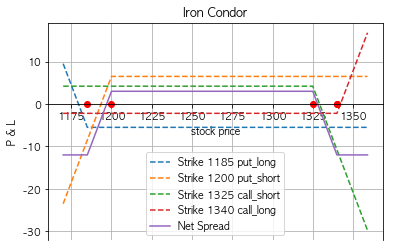

In [35]:
ironCondor((1185, 5.50), (1200, 6.50), (1325, 4.20), (1340, 2.20),  (1170, 1360, 1))

    Buy Sept RUT 770 call for 2.75
    Sell Sept RUT 760 call for 4.05
    Sell Sept RUT 630 put for 5.90
    Buy Sept RUT 620 put for 4.80

Max Profit = 2.40
Max Loss = -7.60
Net Premium = 2.40
    Premium sold = 9.95
    Premium bought = 7.55
Win Probability = 76.00 %


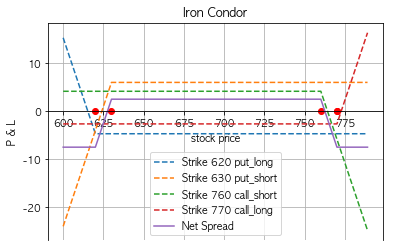

In [36]:
ironCondor((620, 4.80), (630, 5.90), (760, 4.05), (770, 2.75),  (600, 790, 1))

    Netflix 의 $95 call 을 팔고 $100 call 을 사서 net preminum 이 $1.45($10.15 - $8.70) 이 되도록 하고, 동시에 $85 put 을 팔고, $80 풋을 사서 net credit 이 $1.65($8.80 - $7.15) 가 되도록 한다. Total credit 은 $3.10 이 된다.
    이 전략의 최대 이익은 수수한 premium 이고 주가가 $85 와 $95 사이에서 옵션 만기가 되면 얻어진다. 최대 손실은 주식이 $100 call 행사가 이상이나 $80 put 행사가 밑으로 가면 발생한다. 이 경우 최대 손실은 call 과 put 옵션의 행사가 차이에서 수수한 프리미엄을 제외한 $1.90 이 된다.($5 - $3.10)
    Iron condor 는 상대적으로 낮은 payoff 를 갖지만 잠재적인 손실도 매우 제한적이다.

Max Profit = 3.10
Max Loss = -1.90
Net Premium = 3.10
    Premium sold = 18.95
    Premium bought = 15.85
Win Probability = 38.00 %


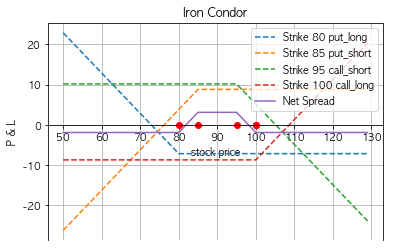

In [37]:
ironCondor((80, 7.15), (85, 8.80), (95, 10.15),  (100, 8.70), (50, 130, 1))

    사례2) RAI 주식이 $67 ~ $75 사이의 박스권을 최소 수주일 계속할 것으로 예상된다. 현재 이 옵션의 IV 는 25% 이고 이것은 연간 IV 변동폭이 12% - 30% 이므로 꽤 높게 inflate 되어 있다.

    $65 아래의 행사가로 put option 을 팔고, $75 근처에서 call option 을 판다. 4월 22일 만기 옵션을 이용하고 잔존 일수는 22 일이다. 이 거래의 total 프리미엄은 주당 $1.20 이 된다.
    
    이 거래의 보험으로서 $80 call 과 $60 put 을 산다. 프리미엄은 주당 $.50 이고 net credit 은 주당 $.70 이 된다.

Max Profit = 0.70
Max Loss = -4.30
Net Premium = 0.70
    Premium sold = 1.20
    Premium bought = 0.50
Win Probability = 86.00 %


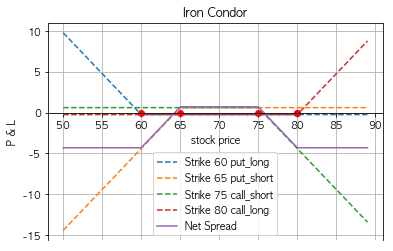

In [38]:
ironCondor((60, 0.25), (65, 0.6), (75, 0.6),  (80, 0.25), (50, 90, 1))